In [1]:
# This is a sample script to analyze the results of measuring talker_listener.
# Please build the trace_analysis package before using it.
# The source code used for the measurement can be found here:
# https://github.com/hsgwa/trace_samples

In [2]:
import os
import sys
from pathlib import Path

sys.path.append(os.path.join(os.path.dirname(Path().resolve()), '..'))

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# build and source trace_analysis package
from trace_analysis import Architecture, Application, Lttng

In [5]:
trace_dir_path = './talker_listener/'
lttng = Lttng(trace_dir_path, force_conversion=True)

found converted file but will re-create it: ./talker_listener/converted
converting trace directory: ./talker_listener
converted 397 events in 67 ms
output written to: ./talker_listener/converted
 [100%] [Ros2Handler]


In [6]:
arch = Architecture()
architecture_path = './talker_listener/architecture.yaml'
arch.import_file(file_path = architecture_path, file_type='yaml', latency_composer=lttng)

In [7]:
app = Application(arch)

In [19]:
node = app.nodes[0]
print('node_name: ' + node.node_name)

callback = node.callbacks[0]
print('callback_type: ' + callback.TYPE_NAME)
print('subscription topic name :' + callback.topic_name)
print('callback_name: ' + callback.callback_name)
print('callback symbol: ' + callback.symbol)
print('callback unique name: ' + callback.unique_name)

node_name: /listener
callback_name: subscription_callback_0
callback_type: subscription_callback
callback symbol: demo_nodes_cpp::Listener::Listener(rclcpp::NodeOptionsconst&)::{lambda(std::shared_ptr<std_msgs::msg::String>)#1}
callback :/chatter
callback unique name: /listener/subscription_callback_0


In [25]:
start_callback_unique_name = app.callbacks[1].unique_name
end_callback_unique_name = app.callbacks[0].unique_name
print('path search')
print('start_callback: ' + start_callback_unique_name)
print('end_callback: ' + end_callback_unique_name)

path search
start_callback: /talker/timer_callback_0
end_callback: /listener/subscription_callback_0


In [26]:
paths = app.search_paths(start_callback_unique_name, end_callback_unique_name)

In [29]:
path = paths[0]

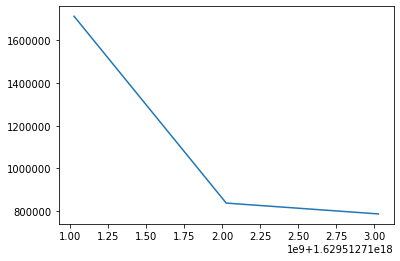

In [34]:
t, latency = path.to_timeseries()
plt.plot(t, latency)

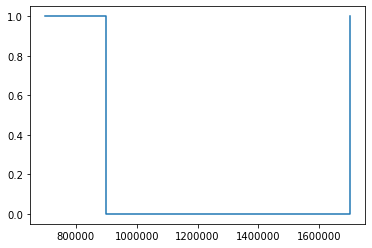

In [39]:
histogram, bins = path.to_histogram(binsize_ns=100000)
plt.step(bins[:-1], histogram, where='post')

In [41]:
df = path.to_dataframe()
df

,/talker/timer_callback_0/callback_start_timestamp/0,/talker/timer_callback_0/rclcpp_publish_timestamp/0,/talker/timer_callback_0/rcl_publish_timestamp/0,/talker/timer_callback_0/dds_write_timestamp/0,/talker/timer_callback_0/callback_end_timestamp/0,/listener/subscription_callback_0/on_data_available_timestamp/0,/listener/subscription_callback_0/callback_start_timestamp/0,/listener/subscription_callback_0/callback_end_timestamp/0
0,1629512713026484672,1629512713026674126,1629512713026676447,1629512713026677993,1629512713026797635,1629512713026922667,1629512713027120703,1629512713027270331
1,1629512712026505334,1629512712026720570,1629512712026722851,1629512712026724459,1629512712026847177,1629512712026967028,1629512712027184409,1629512712027341824
2,1629512711026543549,1629512711027142268,1629512711027147783,1629512711027149913,1629512711027305044,1629512711027425319,1629512711027851990,1629512711028257330


([<matplotlib.axis.YTick at 0x7fd5f510ed30>,
 <a list of 8 Text yticklabel objects>)

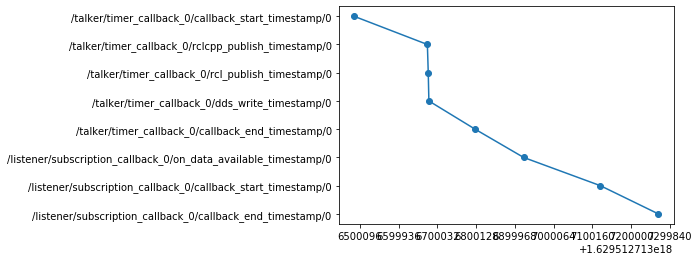

In [65]:
for i, row in df.iterrows():
    x = row.values
    y = np.array(range(len(x))) * -1
    plt.plot(x, y, marker='o')
    break

plt.yticks(y, df.columns)